# 0.0. Importações

In [48]:
import math
import random
import pickle
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import datetime as dt

from math                        import floor
from xgboost                     import XGBRegressor
from hyperopt                    import fmin, tpe, hp, Trials
from bayes_opt                   import BayesianOptimization
from matplotlib                  import pyplot as plt
from sklearn.tree                import DecisionTreeRegressor
from sklearn.metrics             import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, make_scorer
from sklearn.compose             import ColumnTransformer
from sklearn.ensemble            import RandomForestRegressor
from sklearn.linear_model        import LinearRegression
from sklearn.preprocessing       import OneHotEncoder
from sklearn.model_selection     import train_test_split, cross_val_score

In [3]:
pd.set_option('display.max_colwidth', None)

## 0.1. Carregar Dados

In [4]:
df = pd.read_csv("/Users/joao/Library/Mobile Documents/com~apple~CloudDocs/VSCODE/MBA Machine Learning in Production /Introdução ao Machine Learning/Atividade 1/atividade-1-precificacao-laptops.csv")

In [5]:
# Substituir "Null" por NaN
df.replace("Null", np.nan, inplace=True)

In [6]:
df.head(15)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,"ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6""",New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,"Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6""",New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,"ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6""",New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,"MSI Katana GF66 12UC-082XES Intel Core i7-12700H/16GB/1TB SSD/RTX3050/15.6""",New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,"HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB SSD/15.6""",New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,"MSI Crosshair 17 C12VF-264XES Intel Core i7-12650H/32GB/1TB SSD/RTX 4060/17.3""",New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,"Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8GB/256GB SSD/14""",New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,"ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-1065G7/8GB/512GB SSD/15.6""",New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,"Medion Akoya E15415 Intel Core i5-10210U/8GB/256GB SSD/15.6""",New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,"HP Victus 16-d1038ns Intel Core i7-12700H/16GB/512GB SSD/RTX 3050/16.1""",New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


# 1.0. Descrição dos Dados

## 1.1. Dimensão dos Dados

In [7]:
print ("Número de Linhas:{}" .format( df.shape[0]))
print ("Número de Colunas:{}" .format( df.shape[1]))

Número de Linhas:2160
Número de Colunas:12


## 1.2. Tipo dos Dados

In [8]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

## 1.3.  Checar Dados Faltantes

In [9]:
df.isna().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

## 1.4. Preencher os Dados Faltantes

### 1.4.1. Storage Type

In [10]:
storage_type_counts = df["Storage type"].value_counts(dropna=False)

# Exibir os valores únicos com suas contagens
print(storage_type_counts)

SSD     2062
eMMC      56
NaN       42
Name: Storage type, dtype: int64


In [11]:
# Filtrar linhas onde "Storage type" é NaN
nan_rows = df[df["Storage type"].isna()]

# Mostrar valores das colunas "Storage" e "Storage type" para onde "Storage type" é NaN
result = nan_rows[["Storage", "Storage type"]].sort_values(by="Storage", ascending=False)

# Mostrar o resultado
print(result)

      Storage Storage type
260      1000          NaN
1896     1000          NaN
945       512          NaN
1644      512          NaN
1132      512          NaN
1146      512          NaN
1174      512          NaN
1085      512          NaN
1452      500          NaN
581       500          NaN
1145      500          NaN
747       500          NaN
787       500          NaN
1571      256          NaN
1574      256          NaN
1662      256          NaN
1104      256          NaN
1131      256          NaN
1643      256          NaN
600       256          NaN
875       256          NaN
731       256          NaN
1742      256          NaN
493       256          NaN
569       256          NaN
1743      256          NaN
1612      128          NaN
1587      128          NaN
1013      128          NaN
931       128          NaN
1167      128          NaN
843       128          NaN
927       128          NaN
1173      128          NaN
1661       64          NaN
2133       64          NaN
4

In [12]:
#Entender o motivo do storage estar zerado 
pd.set_option('display.max_colwidth', None)
# Display the content of row 189
row_189 = df.iloc[189]  
print(row_189)

Laptop          Portátil Alurin Flex Advance Intel Core I5-1155G7 14"
Status                                                    Refurbished
Brand                                                          Alurin
Model                                                    Flex Advance
CPU                                                     Intel Core i5
RAM                                                                 8
Storage                                                             0
Storage type                                                      NaN
GPU                                                               NaN
Screen                                                           14.0
Touch                                                              No
Final Price                                                     368.7
Name: 189, dtype: object


In [13]:
#Esse modelo na verdade tem a capacidade de 500GB de SSD
df.at[189, "Storage"] = 500

#verificar a alteração feita
row_189 = df.iloc[189]  
print("\n" + str(row_189))


Laptop          Portátil Alurin Flex Advance Intel Core I5-1155G7 14"
Status                                                    Refurbished
Brand                                                          Alurin
Model                                                    Flex Advance
CPU                                                     Intel Core i5
RAM                                                                 8
Storage                                                           500
Storage type                                                      NaN
GPU                                                               NaN
Screen                                                           14.0
Touch                                                              No
Final Price                                                     368.7
Name: 189, dtype: object


In [14]:
# Substituir NaN na coluna "Storage type" com base na condição
df.loc[df["Storage"] < 128, "Storage type"] = "eMMC"
df.loc[df["Storage"] >= 128, "Storage type"] = "SSD"

In [15]:
storage_type_counts = df["Storage type"].value_counts(dropna=False)

# Exibir os valores únicos com suas contagens
print(storage_type_counts)

SSD     2111
eMMC      49
Name: Storage type, dtype: int64


### 1.4.2. GPU

In [16]:
cpu_type_counts = df["GPU"].value_counts(dropna=False)

# Exibir os valores únicos com suas contagens
print(cpu_type_counts)

NaN                   1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

In [17]:
# Substituir NaN na coluna "GPU" por "None"
df["GPU"].fillna("None", inplace=True)

In [18]:
cpu_type_counts = df["GPU"].value_counts(dropna=False)

# Exibir os valores únicos com suas contagens
print(cpu_type_counts)

None                  1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

### 1.4.3. Screen

In [19]:
# Filtrar linhas com valores NaN na coluna 'Storage type'
nan_rows = df[df['Screen'].isna()]

# Mostrar as linhas com valores NaN na coluna 'Storage type'
print(nan_rows)

                                                                                            Laptop  \
624                                    Acer Extensa 15 EX215-54 Intel Core i5-1135G7/8GB/256GB SSD   
1430  HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel Core i7-1255U/16GB/512GB SSD/RTX2050/Tátil (PT)   
1503                      Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 5600H/16GB/512GB SSD/RTX 3060   
1548                       Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H/16GB/512GB SSD/RTX A2000   

     Status   Brand     Model            CPU  RAM  Storage Storage type  \
624     New    Acer   Extensa  Intel Core i5    8      256          SSD   
1430    New      HP      Envy  Intel Core i7   16      512          SSD   
1503    New  Lenovo   IdeaPad    AMD Ryzen 5   16      512          SSD   
1548    New  Lenovo  ThinkPad  Intel Core i7   16      512          SSD   

            GPU  Screen Touch  Final Price  
624        None     NaN    No       524.99  
1430   RTX 2050     NaN

In [20]:
# Substituir valores nulos na coluna 'Screen' por 15.60 após pesquisar os 4 modelos na internet
df['Screen'].fillna(15.60, inplace=True)

In [21]:
# Filtrar linhas com valores NaN na coluna 'Storage type'
nan_rows = df[df['Screen'].isna()]

# Mostrar as linhas com valores NaN na coluna 'Storage type'
nan_rows

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price


## 1.4.4. Checar se todos foram preenchidos

In [22]:
df.isna().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

# 2.0. Análises Gráficas

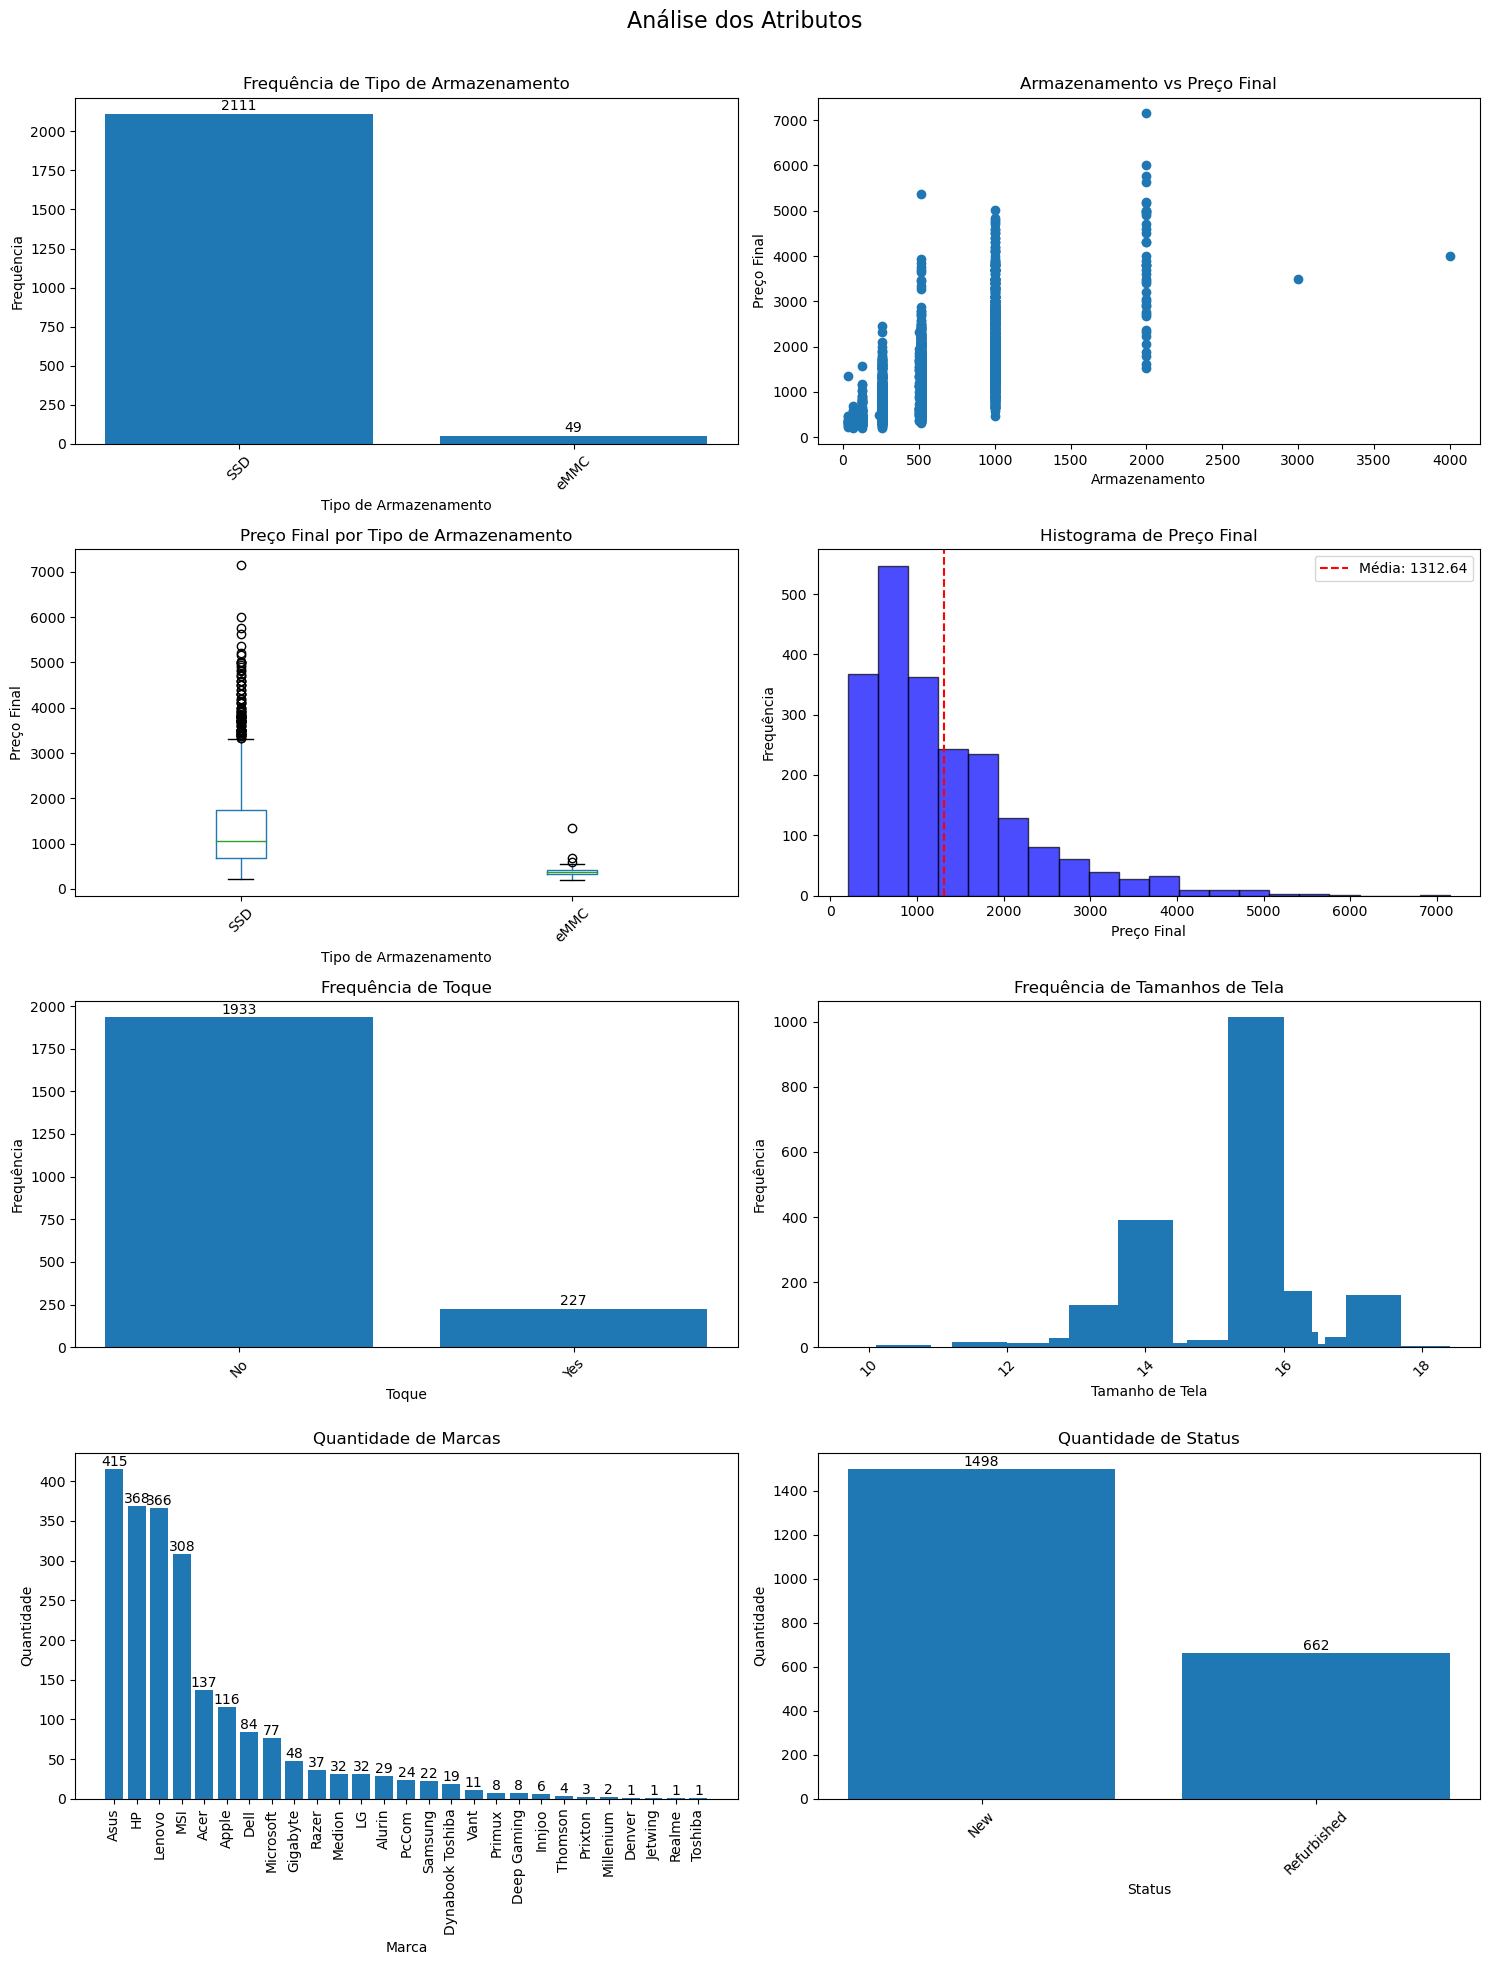

In [23]:
# Criar subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Gráfico de Barras para Tipo de Armazenamento
storage_type_counts = df['Storage type'].value_counts()
bars1 = axs[0, 0].bar(storage_type_counts.index, storage_type_counts)
axs[0, 0].set_title('Frequência de Tipo de Armazenamento')
axs[0, 0].set_xlabel('Tipo de Armazenamento')
axs[0, 0].set_ylabel('Frequência')
axs[0, 0].tick_params(axis='x', rotation=45)

for bar in bars1:
    yval = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', color='black')

# Gráfico de Dispersão para Armazenamento vs Preço Final
axs[0, 1].scatter(df['Storage'], df['Final Price'])
axs[0, 1].set_title('Armazenamento vs Preço Final')
axs[0, 1].set_xlabel('Armazenamento')
axs[0, 1].set_ylabel('Preço Final')

# Gráfico de Caixas (Boxplot) para Preço Final por Tipo de Armazenamento
df.boxplot(column='Final Price', by='Storage type', grid=False, ax=axs[1, 0])
axs[1, 0].set_title('Preço Final por Tipo de Armazenamento')
axs[1, 0].set_xlabel('Tipo de Armazenamento')
axs[1, 0].set_ylabel('Preço Final')
axs[1, 0].tick_params(axis='x', rotation=45)

# Histograma para Preço Final com linha da média em vermelho
n, bins, patches = axs[1, 1].hist(df['Final Price'], bins=20, edgecolor='k', color='blue', alpha=0.7)
mean_price = df['Final Price'].mean()
axs[1, 1].axvline(x=mean_price, color='red', linestyle='--', label=f'Média: {mean_price:.2f}')
axs[1, 1].set_title('Histograma de Preço Final')
axs[1, 1].set_xlabel('Preço Final')
axs[1, 1].set_ylabel('Frequência')
axs[1, 1].legend()

# Gráfico de Barras para Toque com Rótulos de Dados
touch_counts = df['Touch'].value_counts()
bars2 = axs[2, 0].bar(touch_counts.index, touch_counts)
axs[2, 0].set_title('Frequência de Toque')
axs[2, 0].set_xlabel('Toque')
axs[2, 0].set_ylabel('Frequência')
axs[2, 0].tick_params(axis='x', rotation=45)

for bar in bars2:
    yval = bar.get_height()
    axs[2, 0].text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom', color='black')

# Gráfico de Barras para Tamanho de Tela
screen_counts = df['Screen'].value_counts()
bars3 = axs[2, 1].bar(screen_counts.index, screen_counts)
axs[2, 1].set_title('Frequência de Tamanhos de Tela')
axs[2, 1].set_xlabel('Tamanho de Tela')
axs[2, 1].set_ylabel('Frequência')
axs[2, 1].tick_params(axis='x', rotation=45)

# Gráfico de Barras para Quantidade de Brand com rótulos de dados horizontais
brand_counts = df['Brand'].value_counts()
bars4 = axs[3, 0].bar(brand_counts.index, brand_counts)
axs[3, 0].set_title('Quantidade de Marcas')
axs[3, 0].set_xlabel('Marca')
axs[3, 0].set_ylabel('Quantidade')
axs[3, 0].tick_params(axis='x', rotation=90)
for bar in bars4:
    yval = bar.get_height()
    axs[3, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black')

# Gráfico de Barras para Quantidade de Status com rótulos de dados horizontais
status_counts = df['Status'].value_counts()
bars5 = axs[3, 1].bar(status_counts.index, status_counts)
axs[3, 1].set_title('Quantidade de Status')
axs[3, 1].set_xlabel('Status')
axs[3, 1].set_ylabel('Quantidade')
axs[3, 1].tick_params(axis='x', rotation=45)
for bar in bars5:
    yval = bar.get_height()
    axs[3, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', color='black')

# Título global para os subplots
plt.suptitle('Análise dos Atributos\n\n', fontsize=16)

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os subplots
plt.show()

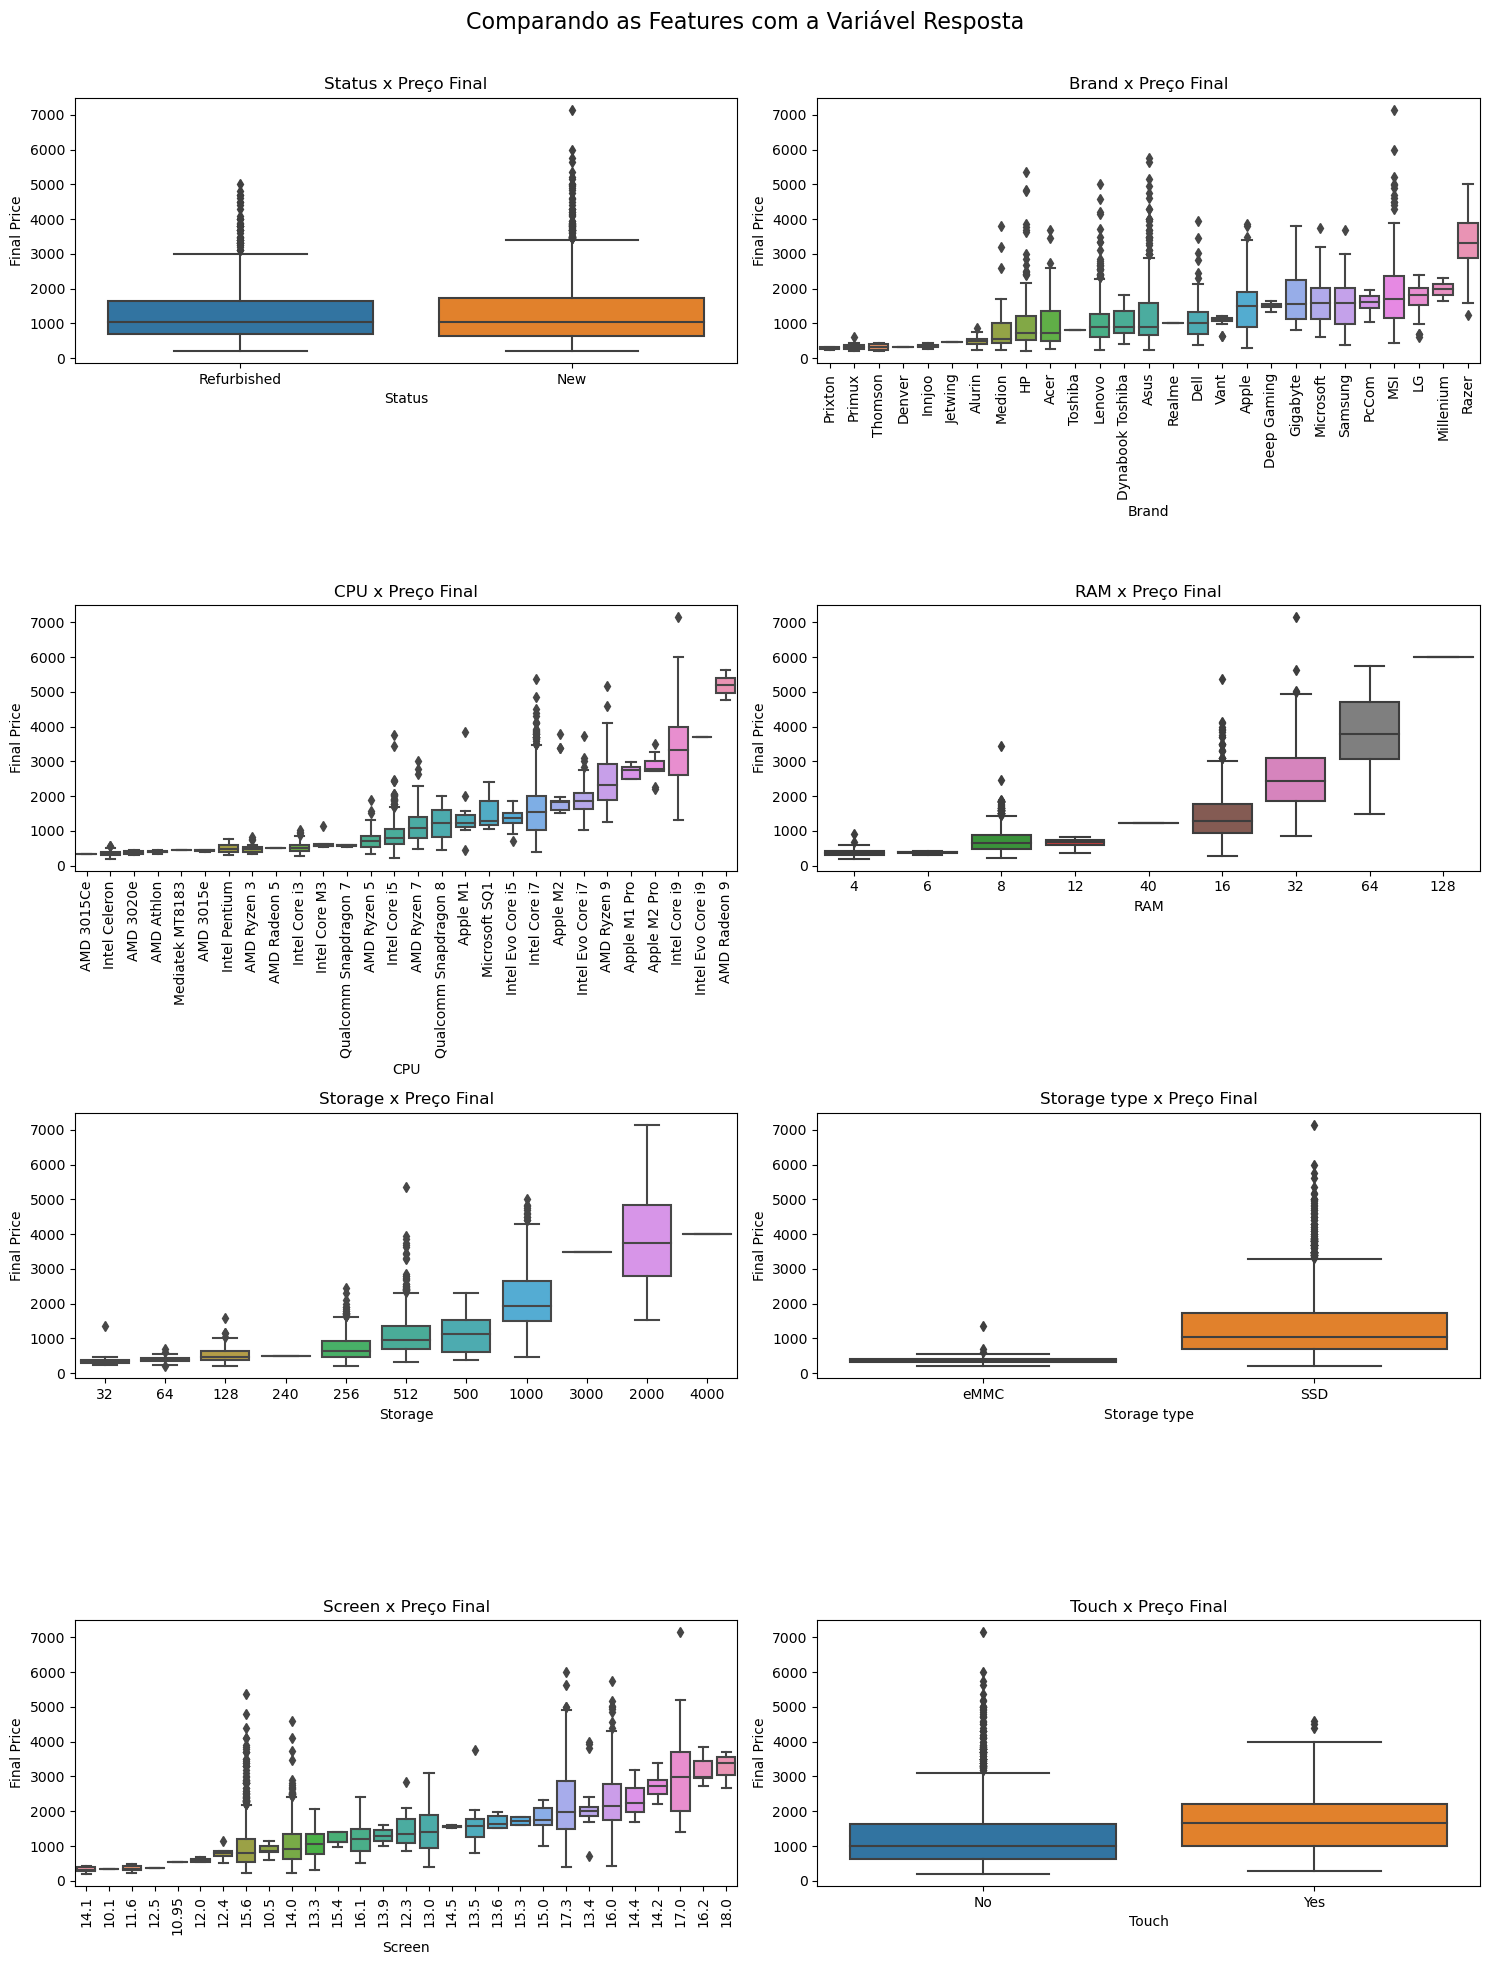

In [24]:
# Criar subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Gráfico de Barras para Status x Preço Final
status_order = df.groupby('Status')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Status', y='Final Price', ax=axs[0, 0], order=status_order)
axs[0, 0].set_title('Status x Preço Final')

# Gráfico de Barras para Brand x Preço Final
brand_order = df.groupby('Brand')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Brand', y='Final Price', ax=axs[0, 1], order=brand_order)
axs[0, 1].set_title('Brand x Preço Final')
axs[0, 1].tick_params(axis='x', rotation=90)

# Gráfico de Barras para CPU x Preço Final
cpu_order = df.groupby('CPU')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='CPU', y='Final Price', ax=axs[1, 0], order=cpu_order)
axs[1, 0].set_title('CPU x Preço Final')
axs[1, 0].tick_params(axis='x', rotation=90)

# Gráfico de Barras para RAM x Preço Final
ram_order = df.groupby('RAM')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='RAM', y='Final Price', ax=axs[1, 1], order=ram_order)
axs[1, 1].set_title('RAM x Preço Final')
axs[1, 1].tick_params(axis='x', rotation=0)

# Gráfico de Barras para Storage x Preço Final
storage_order = df.groupby('Storage')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Storage', y='Final Price', ax=axs[2, 0], order=storage_order)
axs[2, 0].set_title('Storage x Preço Final')
axs[2, 0].tick_params(axis='x', rotation=0)

# Gráfico de Barras para Storage type x Preço Final
storage_type_order = df.groupby('Storage type')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Storage type', y='Final Price', ax=axs[2, 1], order=storage_type_order)
axs[2, 1].set_title('Storage type x Preço Final')

# Gráfico de Barras para Screen x Preço Final
screen_order = df.groupby('Screen')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Screen', y='Final Price', ax=axs[3, 0], order=screen_order)
axs[3, 0].set_title('Screen x Preço Final')
axs[3, 0].tick_params(axis='x', rotation=90)

# Gráfico de Barras para Touch x Preço Final
touch_order = df.groupby('Touch')['Final Price'].median().sort_values().index
sns.boxplot(data=df, x='Touch', y='Final Price', ax=axs[3, 1], order=touch_order)
axs[3, 1].set_title('Touch x Preço Final')

# Título global para os subplots
plt.suptitle('Comparando as Features com a Variável Resposta\n\n', fontsize=16)

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Exibir os subplots
plt.show()

# 3.0. Preparação dos Dados

In [25]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

## 3.1. Encoding

In [26]:
cat_columns = ['Status', 'Brand', 'Model', 'CPU', 'Storage type', 'GPU', 'Touch']
num_columns = ['RAM', 'Storage', 'Screen']
target = 'Final Price'

# Create a new DataFrame with the specified columns
df_encoded = df[num_columns]

print(df_encoded.shape)
df_encoded.head()

(2160, 3)


,RAM,Storage,Screen
0,8,512,15.6
1,8,256,15.6
2,8,256,15.6
3,16,1000,15.6
4,16,512,15.6


In [27]:
X = df_encoded
y = df['Final Price']

# Defina as variáveis de recursos e alvo
recursos = X.columns
alvo = y.name

# Divida os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_treino.shape)
X_treino.head()

(1728, 3)


,RAM,Storage,Screen
1776,8,512,15.6
381,4,64,14.0
1242,16,512,15.6
1805,16,1000,15.6
1865,16,512,15.6


In [28]:
# Inicializador OneHotEncoder
encoder = OneHotEncoder()

# Inicializador ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('cat', encoder, cat_columns)]
)

# Aplicando as transformações para obter a matriz esparsa
transformed_data = preprocessor.fit_transform(df)

# Convertendo a matriz esparsa para um array denso
transformed_array = transformed_data.toarray()

# Novos nomes de colunas após a codificação one-hot
new_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat_columns)

# Convertendo de volta para um DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=new_column_names.tolist())

print(transformed_df.shape)
transformed_df.head()

(2160, 227)


,Status_New,Status_Refurbished,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,Brand_Denver,Brand_Dynabook Toshiba,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Concatenando com o restante das covariáveis
df_encoded = pd.concat([df_encoded, transformed_df], axis=1)

print(df_encoded.shape)
df_encoded.head()

(2160, 230)


,RAM,Storage,Screen,Status_New,Status_Refurbished,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes
0,8,512,15.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,256,15.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8,256,15.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16,1000,15.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16,512,15.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X = df_encoded
y = df['Final Price']

# Variáveis de recursos e alvo
features = X.columns
target = y.name

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
X_train.head()

(1728, 230)


,RAM,Storage,Screen,Status_New,Status_Refurbished,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Touch_No,Touch_Yes
1776,8,512,15.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
381,4,64,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1242,16,512,15.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1805,16,1000,15.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1865,16,512,15.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 4.0. Modelos de Machine Learning

## 4.1. Regressão Linear

In [31]:
# Inicialização e treinamento do modelo de Regressão Linear
linear_model = LinearRegression().fit(X_train, y_train)

# Previsões com base nos dados de teste
y_pred_linear = linear_model.predict(X_test)

# Cálculo do MAE (Erro Médio Absoluto)
mae = mean_absolute_error(y_test, y_pred_linear)

# Cálculo do MAPE (Erro Percentual Médio Absoluto)
mape = mean_absolute_percentage_error(y_test, y_pred_linear)

# Cálculo do RMSE (Erro Quadrático Médio da Raiz)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Resultados
print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
print(f"MAPE (Erro Percentual Médio Absoluto): {mape:.2f}")
print(f"RMSE (Erro Quadrático Médio da Raiz): {rmse:.2f}")

MAE (Erro Médio Absoluto): 10220141544.47
MAPE (Erro Percentual Médio Absoluto): 9176932.96
RMSE (Erro Quadrático Médio da Raiz): 72885370732.88


### 4.1.1 Regressão Linear - Cross Validation

In [32]:
# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Criar uma função de pontuação personalizada para o cross_val_score
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Inicialização do modelo de regressão linear
linear_model = LinearRegression()

# Realizar validação cruzada com 5 folds
cv_scores_mae = -cross_val_score(linear_model, X_train, y_train, cv=5, scoring=scorer)

# Calcular o MAE médio
mean_mae = np.mean(cv_scores_mae)

# Calcular o MAPE médio
cv_scores_mape = cross_val_score(linear_model, X_train, y_train, cv=5, scoring=make_scorer(mape))
mean_mape = np.mean(cv_scores_mape)

# Calcular o RMSE médio
cv_scores_rmse = cross_val_score(linear_model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mean_rmse = np.sqrt(np.mean(cv_scores_rmse))

# Exibir os resultados da validação cruzada
print(f"MAE médio: {mean_mae:.2f}")
print(f"MAPE médio: {mean_mape:.2f}%")
print(f"RMSE médio: {mean_rmse:.2f}")

MAE médio: 6966060559.29
MAPE médio: 1236072936.86%
RMSE médio: 54162138027.49


## 4.2. Regressão de Árvore de Decisão

In [33]:
# Inicialização do modelo de Regressão de Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)

# Treinamento do modelo com os dados de treinamento
dt_model.fit(X_train, y_train)

# Fazer previsões com base nos dados de teste
y_pred_dt = dt_model.predict(X_test)

# Cálculo do MAE (Erro Médio Absoluto)
mae = mean_absolute_error(y_test, y_pred_dt)

# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cálculo do MAPE (Erro Percentual Médio Absoluto)
mape_valor = mape(y_test, y_pred_dt)

# Cálculo do RMSE (Erro Quadrático Médio da Raiz)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Exibição das métricas
print(f"MAE (Erro Médio Absoluto): {mae:.2f}")
print(f"MAPE (Erro Percentual Médio Absoluto): {mape_valor:.2f}%")
print(f"RMSE (Erro Quadrático Médio da Raiz): {rmse:.2f}")

MAE (Erro Médio Absoluto): 308.72
MAPE (Erro Percentual Médio Absoluto): 23.41%
RMSE (Erro Quadrático Médio da Raiz): 539.18


### 4.2.1 Regressão de Árvore de Decisão - Cross Validation

In [34]:
# Inicialização do modelo de Regressão de Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)

# Definindo uma função de pontuação personalizada para o cross_val_score
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Realização da validação cruzada com 5 folds
cv_scores_mae = -cross_val_score(dt_model, X_train, y_train, cv=5, scoring=scorer)

# Cálculo do MAE médio
mean_mae = np.mean(cv_scores_mae)

# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Realização da validação cruzada para o MAPE
cv_scores_mape = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=make_scorer(mape))
mean_mape = np.mean(cv_scores_mape)

# Cálculo do RMSE (Erro Quadrático Médio da Raiz)
cv_scores_rmse = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mean_rmse = np.sqrt(np.mean(cv_scores_rmse))

# Exibição dos resultados da validação cruzada
print(f"MAE médio durante a validação cruzada: {mean_mae:.2f}")
print(f"MAPE médio durante a validação cruzada: {mean_mape:.2f}%")
print(f"RMSE médio durante a validação cruzada: {mean_rmse:.2f}")

MAE médio durante a validação cruzada: 287.61
MAPE médio durante a validação cruzada: 23.58%
RMSE médio durante a validação cruzada: 469.48


## 4.3. Regressão com Floresta Aleatória

In [35]:
# Inicialização do modelo de Regressão com Floresta Aleatória
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Você pode ajustar n_estimators e outros hiperparâmetros

# Treinamento do modelo com os dados de treinamento
rf_model.fit(X_train, y_train)

# Fazer previsões com base nos dados de teste
y_pred_rf = rf_model.predict(X_test)

# Cálculo do MAE (Erro Médio Absoluto)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cálculo do MAPE (Erro Percentual Médio Absoluto)
mape_rf = mape(y_test, y_pred_rf)

# Cálculo do RMSE (Erro Quadrático Médio da Raiz)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Exibição das métricas
print(f"MAE (Erro Médio Absoluto) do modelo de Regressão com Floresta Aleatória: {mae_rf:.2f}")
print(f"MAPE (Erro Percentual Médio Absoluto) do modelo de Regressão com Floresta Aleatória: {mape_rf:.2f}%")
print(f"RMSE (Erro Quadrático Médio da Raiz) do modelo de Regressão com Floresta Aleatória: {rmse_rf:.2f}")

MAE (Erro Médio Absoluto) do modelo de Regressão com Floresta Aleatória: 252.57
MAPE (Erro Percentual Médio Absoluto) do modelo de Regressão com Floresta Aleatória: 20.51%
RMSE (Erro Quadrático Médio da Raiz) do modelo de Regressão com Floresta Aleatória: 423.33


## 4.3.1. Regressão com Floresta Aleatória - Cross Validation

In [36]:
# Inicialização do modelo de Regressão com Floresta Aleatória
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Definindo uma função de pontuação personalizada para o cross_val_score
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Realização da validação cruzada com 5 folds
cv_scores_mae_rf = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring=scorer)

# Cálculo do MAE médio durante a validação cruzada
mean_mae_rf = np.mean(cv_scores_mae_rf)

# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Realização da validação cruzada para o MAPE
cv_scores_mape_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=make_scorer(mape))

# Cálculo do MAPE médio durante a validação cruzada
mean_mape_rf = np.mean(cv_scores_mape_rf)

# Realização da validação cruzada para o RMSE
cv_scores_rmse_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
cv_scores_rmse_rf = np.sqrt(np.abs(cv_scores_rmse_rf))

# Cálculo do RMSE médio durante a validação cruzada
mean_rmse_rf = np.mean(cv_scores_rmse_rf)

# Exibição dos resultados da validação cruzada
print(f"MAE médio durante a validação cruzada: {mean_mae_rf:.2f}")
print(f"MAPE médio durante a validação cruzada: {mean_mape_rf:.2f}%")
print(f"RMSE médio durante a validação cruzada: {mean_rmse_rf:.2f}")

MAE médio durante a validação cruzada: 231.50
MAPE médio durante a validação cruzada: 19.39%
RMSE médio durante a validação cruzada: 367.68


## 4.4. XGBoost com BayesSerchCV

In [38]:
# Definição da função objetivo para otimização bayesiana
def objective(max_depth, min_child_weight, subsample, colsample_bytree, n_estimators, learning_rate):
    params = {
        'max_depth': int(max_depth),
        'min_child_weight': int(min_child_weight),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'n_estimators': int(n_estimators),
        'learning_rate': learning_rate
    }

    model = XGBRegressor(**params)
    mse = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    return mse

# Definição do espaço de busca de hiperparâmetros
param_space = {
    'max_depth': (3, 12),
    'min_child_weight': (5, 20),
    'subsample': (0.8, 1),
    'colsample_bytree': (0.75, 1),
    'n_estimators': (400, 800),
    'learning_rate': (0.01, 0.5)
}

# Inicialização do otimizador bayesiano
optimizer = BayesianOptimization(
    f=objective,
    pbounds=param_space,
    random_state=42
)

# Realização da otimização bayesiana
optimizer.maximize(init_points=10, n_iter=40)

# Obtendo os melhores hiperparâmetros encontrados
best_params = optimizer.max['params']

# Arredondamento dos hiperparâmetros para inteiros
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Inicialização do modelo XGBoost com os melhores hiperparâmetros
best_xgb_model = XGBRegressor(**best_params)

# Treinamento do modelo com os melhores hiperparâmetros
best_xgb_model.fit(X_train, y_train)

# Fazer previsões com base nos dados de teste
y_pred_xgb = best_xgb_model.predict(X_test)

# Cálculo do MAE (Erro Médio Absoluto)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Função para calcular o MAPE (Erro Percentual Médio Absoluto)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Cálculo do MAPE (Erro Percentual Médio Absoluto)
mape_xgb = mape(y_test, y_pred_xgb)

# Cálculo do RMSE (Erro Quadrático Médio da Raiz)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Exibição dos melhores hiperparâmetros encontrados e das métricas
print("Melhores hiperparâmetros encontrados:")
print(best_params)
print(f"MAE (Erro Médio Absoluto) do modelo XGBoost otimizado: {mae_xgb:.2f}")
print(f"MAPE (Erro Percentual Médio Absoluto) do modelo XGBoost otimizado: {mape_xgb:.2f}%")
print(f"RMSE (Erro Quadrático Médio da Raiz) do modelo XGBoost otimizado: {rmse_xgb:.2f}")

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 1.599e+05 | 0.8436    | 0.4759    | 9.588     | 13.98     | 462.4     | 0.8312    |
| 2         | 1.51e+05  | 0.7645    | 0.4344    | 8.41      | 15.62     | 408.2     | 0.994     |
| 3         | 1.236e+05 | 0.9581    | 0.114     | 4.636     | 7.751     | 521.7     | 0.905     |
| 4         | 1.326e+05 | 0.858     | 0.1527    | 8.507     | 7.092     | 516.9     | 0.8733    |
| 5         | 1.387e+05 | 0.864     | 0.3947    | 4.797     | 12.71     | 637.0     | 0.8093    |
| 6         | 1.449e+05 | 0.9019    | 0.09356   | 3.585     | 19.23     | 786.3     | 0.9617    |
| 7         | 1.306e+05 | 0.8262    | 0.05786   | 9.158     | 11.6      | 448.8     | 0.899     |
| 8         | 1.423e+05 | 0.7586    | 0.4556    | 5.329     | 14.94     | 524.7     | 0.904     |
| 9         | 1.423e

Melhores hiperparâmetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 20, 'n_estimators': 455, 'subsample': 1.0}
MAE (Erro Médio Absoluto) do modelo XGBoost otimizado: 283.96
MAPE (Erro Percentual Médio Absoluto) do modelo XGBoost otimizado: 22.99%
RMSE (Erro Quadrático Médio da Raiz) do modelo XGBoost otimizado: 464.46


# 5.0. Comparação dos Resultados

In [42]:
# Crie um dicionário com os resultados dos diferentes modelos
results = {
    'Modelo': [
        'Regressão Linear',
        'Regressão Linear - Cross Validation',
        'Regressão de Árvore de Decisão',
        'Regressão de Árvore de Decisão - Cross Validation',
        'Regressão com Floresta Aleatória',
        'Regressão com Floresta Aleatória - Cross Validation',
        'XGBoost com BayesSearchCV'
    ],
    'MAE': [
        10220141544.47,
        6966060559.29,
        308.72,
        287.61,
        252.57,
        231.50,
        283.96
    ],
    'MAPE': [
        '9176932.96',
        '1236072936.86%',
        '23.41%',
        '23.58%',
        '20.51%',
        '19.39%',
        '22.99%'
    ],
    'RMSE': [
        72885370732.88,
        54162138027.49,
        539.18,
        469.48,
        423.33,
        367.68,
        464.46
    ]
}

# Crie um DataFrame a partir do dicionário
df_results = pd.DataFrame(results)

# Exiba o DataFrame
df_results

,Modelo,MAE,MAPE,RMSE
0,Regressão Linear,1.022014e+10,9176932.96,7.288537e+10
1,Regressão Linear - Cross Validation,6.966061e+09,1236072936.86%,5.416214e+10
2,Regressão de Árvore de Decisão,3.087200e+02,23.41%,5.391800e+02
3,Regressão de Árvore de Decisão - Cross Validation,2.876100e+02,23.58%,4.694800e+02
4,Regressão com Floresta Aleatória,2.525700e+02,20.51%,4.233300e+02
5,Regressão com Floresta Aleatória - Cross Validation,2.315000e+02,19.39%,3.676800e+02
6,XGBoost com BayesSearchCV,2.839600e+02,22.99%,4.644600e+02


In [43]:
print("O modelo com Floresta Aleatória - Cross Validation apresentou o melhor desempenho com base nas métricas MAE, MAPE e RMSE.")

O modelo com Floresta Aleatória - Cross Validation apresentou o melhor desempenho com base nas métricas MAE, MAPE e RMSE.


# 5.1. Salvar o melhor modelo

In [49]:
model_filename = 'modelo_rf.pkl'

# Salvar o modelo em um arquivo pickle
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_model, model_file)